# Clustering Categorical Data 

You are given much more country data. Using the same methodology, group all the countries in clusters.
There are other features: name and continent.

## Import the relevant libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from jupyterthemes import jtplot
jtplot.style(theme='monokai', ticks=True, grid=True)    # using jupyter themes for dark mode plot

from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [93]:
data = pd.read_csv('Categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Plotting the data

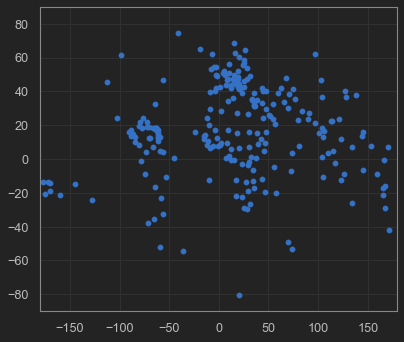

In [94]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [95]:
# using map function to map the categorical data. Not the optimal way, but will work in this case.
data['continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [96]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America':0,
                                                         'Asia':1,
                                                         'Africa':2,
                                                         'Europe':3, 
                                                         'South America':4,
                                                         'Oceania':5,
                                                         'Antarctica':6,
                                                         'Seven seas (open ocean)':7
                                                        })
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


## Select the features

In [107]:
X = data_mapped.iloc[:,1:4]
X

,Longitude,Latitude,continent
0,-69.982677,12.520880,0
1,66.004734,33.835231,1
2,17.537368,-12.293361,2
3,-63.064989,18.223959,0
4,20.049834,41.142450,3
...,...,...,...
236,-172.164851,-13.753243,5
237,47.586762,15.909280,1
238,25.083901,-29.000341,2
239,27.774759,-13.458242,2


## Clustering

Using 4 clusters initially.

In [108]:
kmeans = KMeans(4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [109]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([1, 3, 3, 1, 0, 0, 0, 3, 1, 0, 1, 3, 2, 3, 1, 2, 0, 3, 3, 0, 0, 0,
       2, 0, 3, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 3, 3, 0, 1, 2, 0, 0,
       3, 3, 1, 1, 3, 0, 1, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 0, 1, 0, 3,
       0, 0, 3, 0, 2, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       2, 1, 2, 3, 1, 0, 1, 0, 2, 0, 3, 2, 3, 0, 3, 3, 0, 0, 0, 1, 0, 0,
       2, 3, 3, 3, 3, 2, 1, 1, 2, 0, 3, 2, 0, 0, 0, 1, 0, 3, 3, 0, 0, 0,
       2, 1, 0, 0, 0, 3, 3, 1, 2, 0, 0, 0, 2, 0, 2, 2, 3, 0, 1, 3, 3, 2,
       3, 2, 0, 2, 0, 1, 1, 0, 0, 3, 2, 2, 3, 3, 1, 1, 1, 2, 2, 2, 0, 1,
       2, 0, 1, 0, 1, 3, 0, 2, 3, 0, 3, 3, 3, 0, 2, 1, 0, 2, 0, 1, 0, 3,
       3, 1, 0, 0, 1, 0, 0, 0, 3, 1, 3, 0, 1, 0, 0, 2, 3, 3, 2, 1, 1, 0,
       0, 2, 3, 3, 0, 1, 1, 3, 0, 1, 1, 1, 1, 2, 2, 1, 1, 3, 3, 3, 3],
      dtype=int32)

In [110]:
data_with_clusters = data.copy()
data_with_clusters['cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,cluster
0,Aruba,-69.982677,12.520880,North America,1
1,Afghanistan,66.004734,33.835231,Asia,3
2,Angola,17.537368,-12.293361,Africa,3
3,Anguilla,-63.064989,18.223959,North America,1
4,Albania,20.049834,41.142450,Europe,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania,1
237,Yemen,47.586762,15.909280,Asia,3
238,South Africa,25.083901,-29.000341,Africa,3
239,Zambia,27.774759,-13.458242,Africa,3


## Plot the data

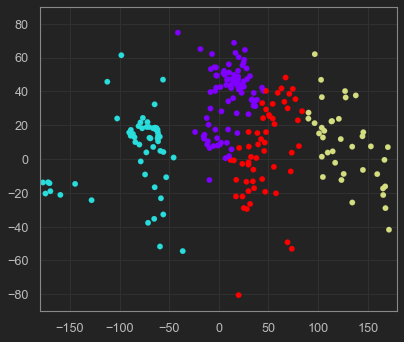

In [111]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['cluster'], cmap='rainbow')
plt.xlim()
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

### Selecting the optimal number of clusters.
### The Elbow Method:
To determine the optimum number of clusters

### WCSS (within cluster sum of squares)

In [112]:
# using the integrate sklearn method 'inertia'
kmeans.inertia_

257286.86747344572

In [114]:
wcss = []
num_clusters = range(1,15)
for i in num_clusters:
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

[1414582.2109547593,
 657709.2003208959,
 325921.88351033407,
 257286.86747344572,
 192783.51302964828,
 152447.07897714293,
 127330.12683633222,
 103276.45627908772,
 85363.02663715676,
 76783.64737137663,
 70357.05579472968,
 65434.97501484283,
 57724.788493334694,
 53564.53232732843]

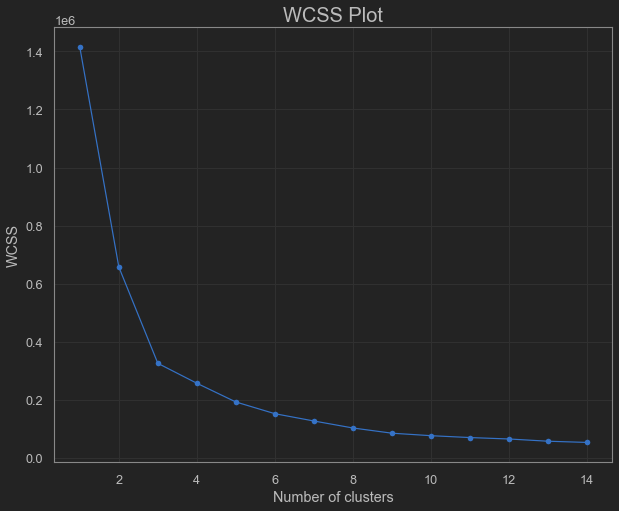

In [120]:
# plotting wcss against number ofclusters
plt.figure(figsize=(10,8))
plt.plot(num_clusters, wcss, marker = 'o')
plt.title('WCSS Plot',size=20)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Plotting for all the elbow points from the above plot togather to get a better idea of what's happening.

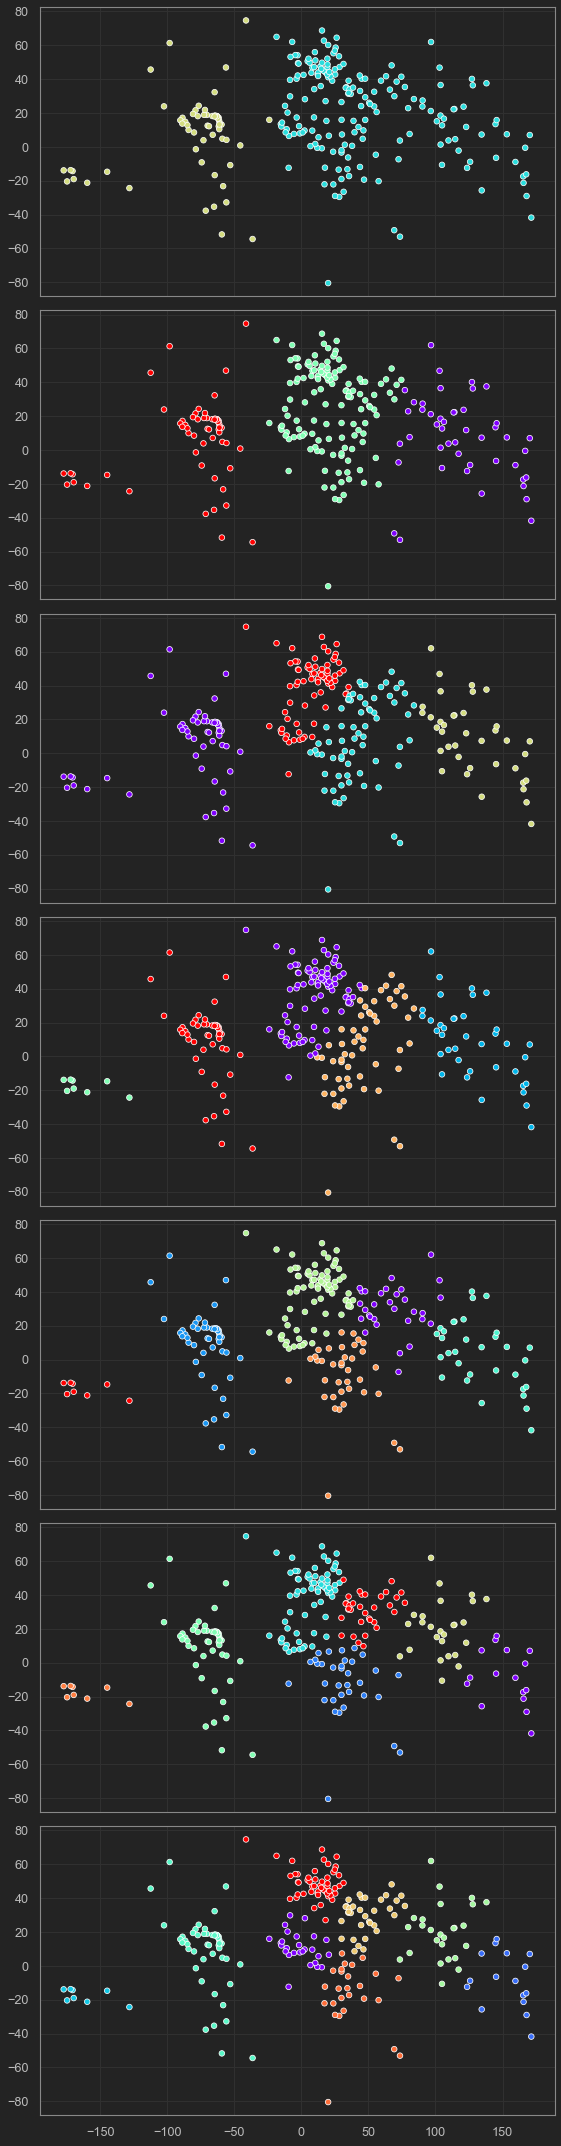

In [164]:
f, axes = plt.subplots(7, sharex=True, sharey=True, figsize=(8,30))
a = 0
for i in range(2,9):
    kmeans = KMeans(i)
    kmeans.fit(X)

    identified_clusters = kmeans.fit_predict(X)
    data_with_clusters = data.copy()
    data_with_clusters['cluster'] = identified_clusters
    
    sns.scatterplot(data['Longitude'], data['Latitude'], legend=False, hue=data_with_clusters['cluster'], palette='rainbow', ax=axes[a])
    axes[a].set_xlabel('')
    axes[a].set_ylabel('')
    a += 1
plt.tight_layout()

###### Consider the following plots as the Earth being split from "Pangea" to different continents and so on.